# 데이터 정리
- 머신러닝을 위해서는 데이터를 수치로 변경해야 함 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bank_data = pd.read_csv('data/bank_data_feats.csv', index_col=0) # 인덱스 컬럼 설정 (추가 방지!)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


#### 수치로 된 데이터에 대한 정보 출력 
- 데이터의 범위 확인

In [3]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


#### 이분법적인 값을 수치 데이터로 변경 
- 각 값의 분포 확인 

In [4]:
bank_data['default'].value_counts()

no     4445
yes      76
Name: default, dtype: int64

* 막대 그래프로 확인하기 

<AxesSubplot:>

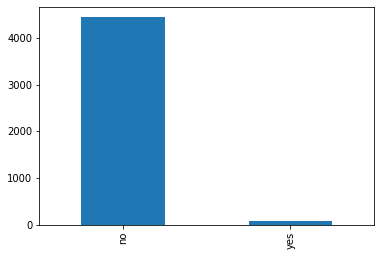

In [5]:
bank_data['default'].value_counts().plot(kind='bar')

* 제목 변경 및 값을 수치로 변경 

In [6]:
bank_data['is_default'] = bank_data['default'].apply(lambda row: 1 if row == 'yes' else 0)
bank_data[['default', 'is_default']].tail()  # 2개 이상의 항목을 확인하기 위해 2차원 배열로 처리 

,default,is_default
4516,no,0
4517,yes,1
4518,no,0
4519,no,0
4520,no,0


In [7]:
bank_data['is_housing'] = bank_data['housing'].apply(lambda row: 1 if row == 'yes' else 0)
bank_data['is_loan'] = bank_data['loan'].apply(lambda item: 1 if item == 'yes' else 0)
bank_data[['housing', 'is_housing', 'loan', 'is_loan']].tail()

,housing,is_housing,loan,is_loan
4516,yes,1,no,0
4517,yes,1,yes,1
4518,no,0,no,0
4519,no,0,no,0
4520,yes,1,yes,1


In [8]:
bank_data.drop(['default', 'housing', 'loan'], axis=1, inplace=True)

In [9]:
bank_data.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,is_default,is_housing,is_loan
0,30,unemployed,married,primary,1787,cellular,19,oct,79,1,-1,0,unknown,0,0,0
1,33,services,married,secondary,4789,cellular,11,may,220,1,339,4,failure,0,1,1
2,35,management,single,tertiary,1350,cellular,16,apr,185,1,330,1,failure,0,1,0
3,30,management,married,tertiary,1476,unknown,3,jun,199,4,-1,0,unknown,0,1,1
4,59,blue-collar,married,secondary,0,unknown,5,may,226,1,-1,0,unknown,0,1,0


#### 범주형 데이터 처리하기
1. 우선 각행에 포함된 값의 분포 확인 
2. 더미행 만들기 
3. 필요하지않은 정보를 제외하기 위해 행 중 하나는 제거 
4. 가독성을 높이기 위해 행제목 변경 
5. 더미 행을 특성 데이터 세트에 합치기 
6. 원래행이 데이터 세트에 포함되 있는 경우 제거

<AxesSubplot:>

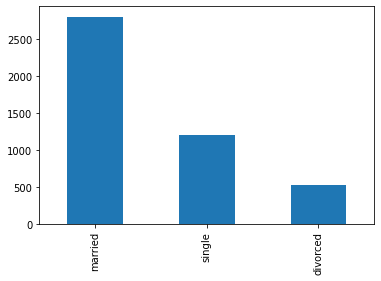

In [10]:
bank_data['marital'].value_counts()
bank_data['marital'].value_counts().plot(kind='bar')

In [11]:
marital_dummies = pd.get_dummies(bank_data['marital'])
marital_dummies

,divorced,married,single
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
4516,0,1,0
4517,0,1,0
4518,0,1,0
4519,0,1,0


In [12]:
marital_dummies.drop('divorced', axis=1, inplace=True)
marital_dummies.columns = [f'marital_{colname}' for colname in marital_dummies.columns]
marital_dummies.head()

,marital_married,marital_single
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [13]:
bank_data = pd.concat([bank_data, marital_dummies], axis=1)
bank_data.drop('marital', axis=1, inplace=True)

In [14]:
bank_data.head()

,age,job,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,is_default,is_housing,is_loan,marital_married,marital_single
0,30,unemployed,primary,1787,cellular,19,oct,79,1,-1,0,unknown,0,0,0,1,0
1,33,services,secondary,4789,cellular,11,may,220,1,339,4,failure,0,1,1,1,0
2,35,management,tertiary,1350,cellular,16,apr,185,1,330,1,failure,0,1,0,0,1
3,30,management,tertiary,1476,unknown,3,jun,199,4,-1,0,unknown,0,1,1,1,0
4,59,blue-collar,secondary,0,unknown,5,may,226,1,-1,0,unknown,0,1,0,1,0


#### job 데이터 처리하기 

In [15]:
bank_data['job'].value_counts() 

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

<AxesSubplot:>

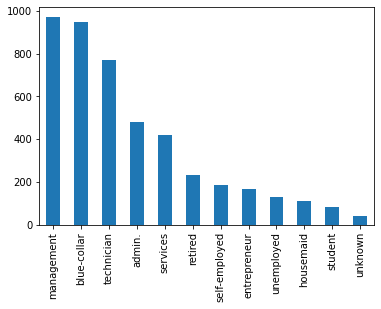

In [16]:
bank_data['job'].value_counts().plot(kind='bar')

In [17]:
job_dummies = pd.get_dummies(bank_data['job']) 
job_dummies

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0,0,0,0,0,0,0,1,0,0,0,0
4517,0,0,0,0,0,0,1,0,0,0,0,0
4518,0,0,0,0,0,0,0,0,0,1,0,0
4519,0,1,0,0,0,0,0,0,0,0,0,0


In [18]:
job_dummies.drop('unknown', axis=1, inplace=True) 

In [19]:
job_dummies.columns = [f'job_{colname}' for colname in job_dummies.columns] 
job_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0


In [20]:
bank_data = pd.concat([bank_data, job_dummies], axis=1)
bank_data.drop('job', axis=1, inplace=True)

In [21]:
bank_data.head()

,age,education,balance,contact,day,month,duration,campaign,pdays,previous,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,30,primary,1787,cellular,19,oct,79,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
1,33,secondary,4789,cellular,11,may,220,1,339,4,...,0,0,0,0,0,0,1,0,0,0
2,35,tertiary,1350,cellular,16,apr,185,1,330,1,...,0,0,0,1,0,0,0,0,0,0
3,30,tertiary,1476,unknown,3,jun,199,4,-1,0,...,0,0,0,1,0,0,0,0,0,0
4,59,secondary,0,unknown,5,may,226,1,-1,0,...,1,0,0,0,0,0,0,0,0,0


#### education 데이터 처리하기

In [22]:
bank_data['education'].value_counts() 

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

<AxesSubplot:>

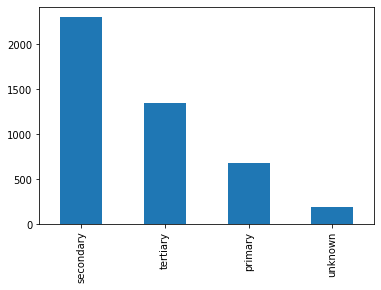

In [23]:
bank_data['education'].value_counts().plot(kind='bar')

In [24]:
education_dummies = pd.get_dummies(bank_data['education']) 
education_dummies

,primary,secondary,tertiary,unknown
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
4516,0,1,0,0
4517,0,0,1,0
4518,0,1,0,0
4519,0,1,0,0


In [25]:
education_dummies.drop('unknown', axis=1, inplace=True) 

In [26]:
education_dummies.columns = [f'education_{colname}' for colname in education_dummies.columns] 
education_dummies.head()

,education_primary,education_secondary,education_tertiary
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [27]:
bank_data = pd.concat([bank_data, education_dummies], axis=1)
bank_data.drop('education', axis=1, inplace=True)

In [28]:
bank_data.head()

,age,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary
0,30,1787,cellular,19,oct,79,1,-1,0,unknown,...,0,0,0,0,0,0,1,1,0,0
1,33,4789,cellular,11,may,220,1,339,4,failure,...,0,0,0,1,0,0,0,0,1,0
2,35,1350,cellular,16,apr,185,1,330,1,failure,...,1,0,0,0,0,0,0,0,0,1
3,30,1476,unknown,3,jun,199,4,-1,0,unknown,...,1,0,0,0,0,0,0,0,0,1
4,59,0,unknown,5,may,226,1,-1,0,unknown,...,0,0,0,0,0,0,0,0,1,0


In [29]:
bank_data['contact'].value_counts() 

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

<AxesSubplot:>

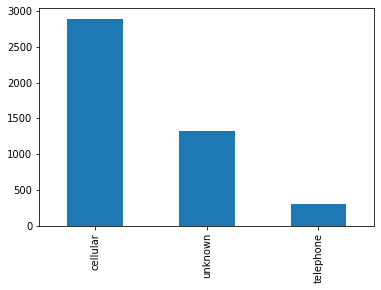

In [30]:
bank_data['contact'].value_counts().plot(kind='bar')

In [31]:
contact_dummies = pd.get_dummies(bank_data['contact']) 
contact_dummies

,cellular,telephone,unknown
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
4516,1,0,0
4517,0,0,1
4518,1,0,0
4519,1,0,0


In [32]:
contact_dummies.drop('unknown', axis=1, inplace=True) 

In [33]:
contact_dummies.columns = [f'contact_{colname}' for colname in contact_dummies.columns] 
contact_dummies.head()

,contact_cellular,contact_telephone
0,1,0
1,1,0
2,1,0
3,0,0
4,0,0


In [34]:
bank_data = pd.concat([bank_data, contact_dummies], axis=1)
bank_data.drop('contact', axis=1, inplace=True)

In [35]:
bank_data.head()

,age,balance,day,month,duration,campaign,pdays,previous,poutcome,is_default,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone
0,30,1787,19,oct,79,1,-1,0,unknown,0,...,0,0,0,0,1,1,0,0,1,0
1,33,4789,11,may,220,1,339,4,failure,0,...,0,1,0,0,0,0,1,0,1,0
2,35,1350,16,apr,185,1,330,1,failure,0,...,0,0,0,0,0,0,0,1,1,0
3,30,1476,3,jun,199,4,-1,0,unknown,0,...,0,0,0,0,0,0,0,1,0,0
4,59,0,5,may,226,1,-1,0,unknown,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
month_map = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}

In [40]:
bank_data['month'].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

<AxesSubplot:>

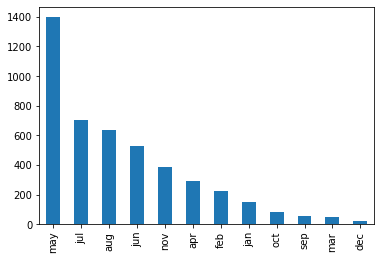

In [41]:
bank_data['month'].value_counts().plot(kind='bar')

In [36]:
bank_data.iloc[0]

age                         30
balance                   1787
day                         19
month                      oct
duration                    79
campaign                     1
pdays                       -1
previous                     0
poutcome               unknown
is_default                   0
is_housing                   0
is_loan                      0
marital_married              1
marital_single               0
job_admin.                   0
job_blue-collar              0
job_entrepreneur             0
job_housemaid                0
job_management               0
job_retired                  0
job_self-employed            0
job_services                 0
job_student                  0
job_technician               0
job_unemployed               1
education_primary            1
education_secondary          0
education_tertiary           0
contact_cellular             1
contact_telephone            0
Name: 0, dtype: object

In [37]:
bank_data.drop(['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome'], axis=1, inplace=True, errors='ignore')

In [38]:
bank_data.dtypes

age                     int64
balance                 int64
day                     int64
month                  object
duration                int64
campaign                int64
pdays                   int64
previous                int64
is_default              int64
is_housing              int64
is_loan                 int64
marital_married         uint8
marital_single          uint8
job_admin.              uint8
job_blue-collar         uint8
job_entrepreneur        uint8
job_housemaid           uint8
job_management          uint8
job_retired             uint8
job_self-employed       uint8
job_services            uint8
job_student             uint8
job_technician          uint8
job_unemployed          uint8
education_primary       uint8
education_secondary     uint8
education_tertiary      uint8
contact_cellular        uint8
contact_telephone       uint8
dtype: object